<a href="https://colab.research.google.com/github/NarsinAshritha/ML_miniproject/blob/main/miniproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
!pip install bing-image-downloader

In [82]:
import bing_image_downloader
!mkdir images
from bing_image_downloader import downloader
downloader.download('apple fruit', limit=30,  output_dir='images', adult_filter_off=True, force_replace=False, timeout=60)
downloader.download('yellow mango fruit', limit=30,  output_dir='images', adult_filter_off=True, force_replace=False, timeout=60)


mkdir: cannot create directory ‘images’: File exists


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://www.healthbenefitstimes.com/9/gallery/apple/Apple-fruit.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://www.chhajedgarden.com/media/catalog/product/cache/1/image/9df78eab33525d08d6e5fb8d27136e95/0/4/04_apples.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://jooinn.com/images/red-apple-fruit-1.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.theayurveda.org/wp-content/uploads/2015/08/Apple-fruit.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://dairyfoodblog.files.wordpress.com/2017/08/apple4.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://treefruit.wsu.edu/wp-content/uploads/2014/10/clonal-apples.jpg
[%] File Downloaded !

[%] Downloading Image #7 from http://aggie-horticulture.tamu.edu/vegetable/files/2011/10/apple26.jpg
[%] File Downloaded !

[%] Download

In [83]:
#preproceesing of data
import os                              #for moving around different folders
import matplotlib.pyplot as plt       #for display of images
import numpy as np                     #for numerical analysis
from skimage.io import imread          #for reading images
from skimage.transform import resize    #for normalizing all images to same size

target=[]
images=[]
flat_data=[]
DATADIR="/content/images"
CATEGORIES=['apple fruit','yellow mango fruit']
for fruit in CATEGORIES:
   class_num=CATEGORIES.index(fruit)
  # print(class_num)
   path=os.path.join(DATADIR,fruit)
  # print(path)
   for img in os.listdir(path):
    #print(img)
    img_array=imread(os.path.join(path,img))
    #print(img_array)
   # print(img_array.shape)
    #plt.imshow(img_array)
    img_resized=resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)    #not used anywhere just for reference
    target.append(class_num)
  

In [84]:
target=np.array(target)
images=np.array(images)
flat_data=np.array(flat_data)



In [85]:
#flat_data             #sklearn normalises values from 0-255 to those between 0-1
#len(flat_data[0])


In [86]:
#target

In [87]:
unique,count=np.unique(target,return_counts=True)
#plt.bar(CATEGORIES,count)

In [88]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flat_data,target,test_size=0.20,random_state=42)

In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
# create a grid of hyper-parameters and just try all of their combinations (best is taken by GridSearchCV)
param_grid=[
            {'C':[10,100,1000],"kernel":['linear']},
            {'C':[100,1000],"kernel":["sigmoid"],"gamma":[0.001,0.0001]},
            {'C':[10,100,1000],'kernel':['rbf'],'gamma':[0.01,0.001,0.0001]},
]
#whichever group(among given three groups) gives best pattern that is chosen by GridSearchCV 
svc=svm.SVC(probability=True)
imgclf=GridSearchCV(svc,param_grid)
imgclf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [10, 100, 1000], 'kernel': ['linear']},
                         {'C': [100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['sigmoid']},
                         {'C': [10, 100, 1000], 'gamma': [0.01, 0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [93]:
y_pred=imgclf.predict(x_test)
y_pred

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [95]:
y_test

array([0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1])

In [94]:
from sklearn.metrics import confusion_matrix,accuracy_score
accuracy_score(y_pred,y_test)

0.9166666666666666

In [97]:
confusion_matrix(y_pred,y_test)

array([[3, 0],
       [1, 8]])

In [100]:
#save the model using pickle library
import pickle
pickle.dump(imgclf,open('imgclf_model.p','wb'))
model=pickle.load(open('imgclf_model.p',"rb"))


enter the url of the testing image:https://images-na.ssl-images-amazon.com/images/I/41EvGpCFECL.jpg
(375, 500, 3)
The predicted output is: yellow mango fruit


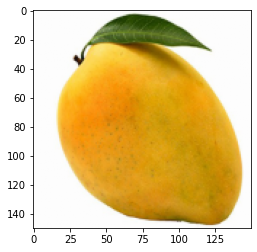

In [107]:
#testing for a new image
flat_data=[]
url=input("enter the url of the testing image:")
img= imread(url)
img_resized=resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out=model.predict(flat_data)
y_out=CATEGORIES[y_out[0]]
print("The predicted output is:",y_out)

# New Section